#### Your Name: 
#### Roll Number:

# 1. Linear Discriminant Analysis
In this part, we will do lda on a synthetic data set. That means we will generate the data ourselves and then fit a linear classifier to this data.

### Step1: Create data set

We are going to sample 500 points each from three 2d gaussian distributions. The means of the three gaussians are $\mu_1 = [a, b]^T$, $\mu_2 = [a+2, b+4]^T$ and $\mu_3 = [a+4, b]^T$ respectively, where **a** is *the last digit of your roll number* and **b** is *second last digit of your roll number*. <br>
Similarly the covariance matrices are $\Sigma_1 = \Sigma_2 = \Sigma_3 = I$ <br>
To generate points from 2d gaussians, we should first know how to generate random numbers.

##### How to generate random numbers?
use numpy random package.

In [1]:
%matplotlib inline
# code to sample a random number between 0 & 1
# Try running this multiple times by pressing Ctrl-Enter
import numpy as np
import matplotlib.pyplot as plt

print np.random.random()


0.797984287484


##### How to sample from a gaussian?
Use randn function to sample from a 1D gaussian with mean 0 and variance 1.

In [14]:
print np.random.randn()

0.20223823459


##### Let's sample 1000 points!
Use random.normal(mu, sigma, number of points). Let'us assume mean is 3.

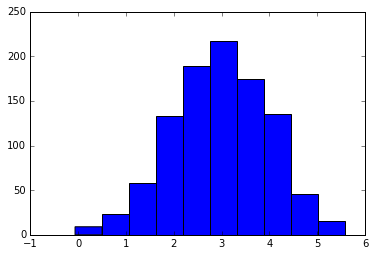

In [6]:
points = np.random.normal(3, 1, 1000)
# A histogram plot. It looks like a gaussian distribution centered around 3
plt.hist(points)
plt.show()

##### Generate samples from a 2D gaussian
Use random.multivariate_normal(mean, cov, 100) to generate 100 points from a multivariate gaussian


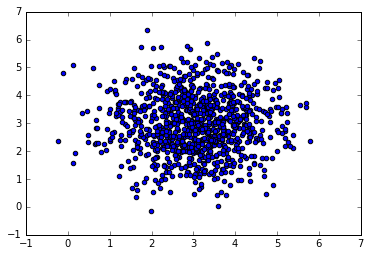

In [7]:
mean = np.array([3, 3])
cov = np.eye(2) # the identity matrix

points = np.random.multivariate_normal(mean, cov, 1000)
# scatter plot with x axis as the first column of points and y axis as the second column
plt.scatter(points[:, 0], points[:, 1])
plt.show()

#### Sample from three different 2D gaussians
The means of the three gaussians should be $\mu_1 = [a, b]^T$, $\mu_2 = [a+2, b+4]^T$ and $\mu_3 = [a+4, b]^T$ respectively, where **a** is *the last digit of your roll number* and **b** is * the second last digit of your roll number*. <br>
Similarly the covariance matrices are $\Sigma_1 = \Sigma_2 = \Sigma_3 = I$ <br>

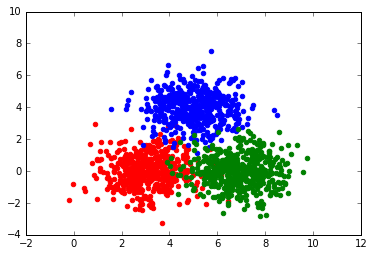

In [8]:
d1 = np.random.multivariate_normal([3, 0], cov, 500)
d2 = np.random.multivariate_normal([5, 4], cov, 500)
d3 = np.random.multivariate_normal([7, 0], cov, 500)

data = np.vstack([d1, d2, d3])
plt.scatter(d1[:, 0], d1[:, 1], color='red')
plt.scatter(d2[:, 0], d2[:, 1], color='blue')
plt.scatter(d3[:, 0], d3[:, 1], color='green')
plt.show()

### Step2: Estimate the Parameters
##### Estimate 3 means and a covariance matrix from data
We have assumed that $\Sigma = \sigma^2 I$. <br>
Convince yourself that the Maximum Likelihood Estimate for $\sigma^2$ is $\frac{1}{2n}\sum\limits_{i=1}^n (x_i-\mu)^T(x_i-\mu)$, where $n$ is the number of samples. <br>

Let's compute the maximum likelihood estimates for the three sets of data points (generated from 3 different gaussians) separately, denote them as $\hat\sigma_1^2$, $\hat\sigma_2^2$ and $\hat\sigma_3^2$ and then take the combined estimate as the averae of the three estimates.

### Step3: Draw the Decision Boundaries
Refer your notes/textbook to convince yourself that in the particular case where all the normal distributions have the same prior and the same covariance matrix of the form $\sigma^2I$, the discriminant functions are given by $$g_i(x) = \mu_i^Tx - \frac{1}{2}\mu_i^T\mu_i$$Find the point at which $g_1(x) = g_2(x) = g_3(x)$ <br>
Draw the three decision boundaries by solving $g_1(x) = g_2(x)$, $g_1(x) =  g_3(x)$ and $g_2(x) = g_3(x)$


# 2. Parzen Window

##### Gaussian kernel smoothing
The kernel density model is given by $$p(x) = \frac{1}{N} \sum_{i=1}^N \frac{1}{(2\pi h^2)^{D/2}} exp\left(\frac{- (x-x_i)^T(x-x_i)}{2h^2}\right) \ $$
where *D* is the dimension (which is 2 here), *h* is the standard deviation parameter we have to set, and *N* is the total number of samples.

##### Density estimation in 1 dimension
Let's generate data from a mixture of two 1D gaussians as follows. Toss a fair coin, if the outcome is heads, sample a data point from the first gaussian, otherwise sample from the second gaussian. The two gaussians have a mean 2 and 4 and a standard deviation of 1.

In [ ]:
# Generate 100 points
points = np.array([])

for i in range(100): # sample 100 points
    if np.random.rand() > 0.5:
        points = np.append(points, np.random.normal(2,1))
    else:
        points = np.append(points, np.random.normal(6,1))

plt.hist(points)
plt.show()

###### Parzen window estimation
Our x ranges approximately from -2 to 10. The pdf is given by $p(x) = \frac{1}{N} \sum\limits_{i=1}^N \frac{1}{(2\pi h^2)^{1/2}} exp\left(\frac{- (x-x_i)^2}{2h^2}\right) \ $ for every value of x. In order to plot the estimated density, we compute the above pdf for a range of x, starting from -2 till 10, incrementing x by 0.02.
Choose different values for the smoothing parameter *h* to get the best density estimate. (Try h=0.08, 0.1, 0.15 etc.) What value of h gives the bimodal distribution?

In [2]:
h = 0.08
X = np.arange(-2, 10, 0.02)
# for each point in x, we have compute its pdf
Y = np.array([])
N = len(points)

for x in X:
    t = 0
    for xi in points:
        t += np.exp(-(x-xi)**2/(2*h*h))
    
    y = (t/(2*np.pi*h*h)**0.5)/N
    Y = np.append(Y, y)

plt.plot(X, Y)
plt.show()
    

NameError: name 'points' is not defined

##### Density estimation in 2 Dimension
Similarly do density estimation for the above data set which we sampled from 3 2d gaussians. 

**Note:** It will be computationally expensive to calculate the density for all the points in the 2D plane. So do density estimation for points in the square [c-2, c+2]x[d-2, d+2] where (c,d) denotes the coordinates of the meeting point of the three discriminant lines in the Linear Discriminant Analysis we have done above.


In [38]:
from mpl_toolkits.mplot3d import Axes3D


